# Notebook 01: Data Loading and Exploration

**Traveco Transport Forecasting Project**

## Objective
Load and explore the three main data files provided by Traveco:
1. Order Analysis (Auftragsanalyse) - 23.6 MB
2. Tour Assignments (Tourenaufstellung) - 2.85 MB
3. Customer Divisions (Sparten) - 28 KB

## Outputs
- Raw data loaded and understood
- Initial data quality assessment
- Column mapping documentation
- Preliminary insights

---

## 1. Setup and Imports

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Custom utilities
import sys
sys.path.append('..')  # Add parent directory to path
from utils.traveco_utils import (
    ConfigLoader,
    TravecomDataLoader,
    TravecomDataCleaner
)

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Setup complete!")

Setup complete!


## 2. Load Configuration

In [2]:
# Load project configuration
config = ConfigLoader('../config/config.yaml')

print("Configuration loaded successfully!")
print(f"\nTarget columns for forecasting: {config.get('features.target_columns')}")
print(f"Lag periods: {config.get('features.lag_periods')}")
print(f"Data path: {config.get('data.raw_path')}")

Configuration loaded successfully!

Target columns for forecasting: ['revenue', 'external_drivers', 'personnel_costs']
Lag periods: [1, 3, 6, 12]
Data path: ../data/swisstransfer_f473fe80-56b4-4ff0-8cbb-1bb5e181450a/


## 3. Load Data Files

### 3.1 Order Analysis (Main Data File)

In [3]:
# Initialize data loader
loader = TravecomDataLoader(config)

# Load order analysis data
print("Loading Order Analysis data...")
df_orders = loader.load_order_analysis()

print(f"\nShape: {df_orders.shape}")
print(f"Memory usage: {df_orders.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading Order Analysis data...
Loading order analysis from: ../data/swisstransfer_f473fe80-56b4-4ff0-8cbb-1bb5e181450a/20251015 Juni 2025 QS Auftragsanalyse.xlsb
Loaded 136,159 orders with 103 columns

Shape: (136159, 103)
Memory usage: 686.60 MB


In [4]:
# Display first few rows
print("First 5 rows of Order Analysis data:")
df_orders.head()

First 5 rows of Order Analysis data:


,NummerKomplett.Auftrag,Nummer.Hauptauftrag,Nummer.Auftrag,Datum.Tour,Nummer.Tour,Tour Bezeichnung,Nummer.Auftraggeber,Id.Dispostelle,AuNr (formatiert),AuNr (Original),Auftrags-art,RKdNr.,RKdArt,RKdName,RKdOrt,Nummer.Versender,Name.Versender,Versender Name 2,Strasse.Versender,Land.Versender,Ort.Versender,PLZ.Versender,Nummer.Empfänger,Name.Empfänger,Empfänger Name2,...,Transportmittel3.Auftrag,Transportmittel4.Auftrag,Transportmittel5.Auftrag,Transportmittel6.Auftrag,Transportmittel7.Auftrag,Transportmittel8.Auftrag,Transportmittel9.Auftrag,Transportmittel10.Auftrag,Anlage Datum,Planstatus.Auftrag,Rückerfasst.Auftrag,Erledigungstatus.Auftrag,Freigabe Abrechnung AU,Freigabe Abrechnung Tour,Belegnummer Gutschrift,Belegnummer Rechnung,Gutschrift erstellt,Rechnung erstellt,Staufaktor.Auftrag,TourTyp.Tour,Distanz_BE.Auftrag,Distanz_VE.Auftrag,System_id.Auftrag,Fakturiert,Tilde.Auftrag
0,S4K80952283~001_0.TRN.0,S4K80952283_0,S4K80952283~001,45809,557265,2130 Kuoni Samedan,7000,7_TRP_Landquart,S4K-809522,80952283,Lieferung,946200,R,Volg Konsumwaren AG,Winterthur,7100,VOLG FLQ KONSUMWAREN AG,NaN,Löserstrasse,CH,LANDQUART,7302,S4K2253,Volg Lavin,Genossenschaft Butia Lavin,...,0,0,0,0,0,0,0,0,45808,T,1,0,Ja,Ja,0100049444.TRP,NaN,Ja,NaN,1,FD,101,138,TRP,1,Ja
1,S4K80952962~001_0.TRN.0,S4K80952962_0,S4K80952962~001,45809,557265,2130 Kuoni Samedan,7000,7_TRP_Landquart,S4K-809529,80952962,Lieferung,946200,R,Volg Konsumwaren AG,Winterthur,7100,VOLG FLQ KONSUMWAREN AG,NaN,Löserstrasse,CH,LANDQUART,7302,S4K2253,Volg Lavin,Genossenschaft Butia Lavin,...,0,0,0,0,0,0,0,0,45808,T,1,100,Ja,Ja,0100049444.TRP,NaN,Ja,NaN,1,FD,101,138,TRP,1,Ja
2,S4K80952284~001_0.TRN.0,S4K80952284_0,S4K80952284~001,45809,557265,2130 Kuoni Samedan,7000,7_TRP_Landquart,S4K-809522,80952284,Lieferung,946200,R,Volg Konsumwaren AG,Winterthur,7100,VOLG FLQ KONSUMWAREN AG,NaN,Löserstrasse,CH,LANDQUART,7302,S4K2256,Volg Guarda,Morell Tahiraj Lucrezia,...,0,0,0,0,0,0,0,0,45808,T,1,0,Ja,Ja,0100049444.TRP,NaN,Ja,NaN,1,FD,101,143,TRP,1,Ja
3,S4K80953674~001_0.TRN.0,S4K80953674_0,S4K80953674~001,45809,557265,2130 Kuoni Samedan,7000,7_TRP_Landquart,S4K-809536,80953674,Lieferung,946200,R,Volg Konsumwaren AG,Winterthur,7100,VOLG FLQ KONSUMWAREN AG,NaN,Löserstrasse,CH,LANDQUART,7302,S4K2256,Volg Guarda,Morell Tahiraj Lucrezia,...,0,0,0,0,0,0,0,0,45808,T,1,100,Ja,Ja,0100049444.TRP,NaN,Ja,NaN,1,FD,101,143,TRP,1,Ja
4,S4K80952229~001_0.TRN.0,S4K80952229_0,S4K80952229~001,45809,557265,2130 Kuoni Samedan,7000,7_TRP_Landquart,S4K-809522,80952229,Lieferung,946200,R,Volg Konsumwaren AG,Winterthur,7100,VOLG FLQ KONSUMWAREN AG,NaN,Löserstrasse,CH,LANDQUART,7302,S4K2460,Volg Scuol Center Augustin,Volg Detailhandels AG,...,0,0,0,0,0,0,0,0,45808,T,1,0,Ja,Ja,0100049444.TRP,NaN,Ja,NaN,1,FD,101,155,TRP,1,Ja


In [5]:
# Display basic info
print("Data types and non-null counts:")
df_orders.info()

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136159 entries, 0 to 136158
Columns: 103 entries, NummerKomplett.Auftrag to Tilde.Auftrag
dtypes: float64(10), int64(3), object(90)
memory usage: 107.0+ MB


### 3.2 Tour Assignments

In [6]:
# Load tour assignments
print("Loading Tour Assignments data...")
df_tours = loader.load_tour_assignments()

print(f"\nShape: {df_tours.shape}")
df_tours.head()

Loading Tour Assignments data...
Loading tour assignments from: ../data/swisstransfer_f473fe80-56b4-4ff0-8cbb-1bb5e181450a/20251015 QS Tourenaufstellung Juni 2025.xlsx
Loaded 14,241 tour assignments

Shape: (14241, 34)


,Datum Tour,Nummer.Tour,Tour Bezeichnung,TourTyp.Tour,System_id.Auftrag,Nr Fahrzeug,Nr Spedition,Name Spedition,Nr. Fhz Typ,Bezeichnung.Fahrzeugtyp,PC KM Kosten,PC Minuten Kosten,Anz. Empfänger,# Aufträge,∑ Frachtpfl. Gewicht,∑ Gewicht,Rückerfasste KM AHZ,Rückerfasste Solo Km,Rückerfasste Tour Stunden,Soll KM PraCar,IstKm.Tour,IST Zeit PraCar,Fahrzeit Tour,Standzeit Tour,Arbeitszeit Chauffeur,Ist Tour Begin,Ist Tour Ende,Tour End (errechnet),Anz RC,Anz RC (TISLOG / PRABORD),Anz RC (ohne TISLOG / PRABORD),Alles in EH,Alles in EH (TISLOG & PRABORD),Alles in EH ( ohne TISLOG & PRABORD)
0,2025-06-01,566888,6140_1,SH,TRP,3. FX6,9126,FruchtXpress GmbH,29,**INAKTIV ab'23_Fremd 2-Achser Kühl,0.956,0.346,22,56,8604.22,8604.22,0,460,8.5,129,0,4.016667,3.00,1.016667,0.0,5.083333,22.033333,9.1,51.0,0,51.0,25.5,0.0,25.5
1,2025-06-01,557269,2134 Kuoni Samedan,FD,TRP,7.Rhb Zug,9249,Rhätische Bahn AG Güterverkehr,-,-,-,-,5,15,3179.77,3179.77,0,0,0,109,0,2.633333,2.15,0.483333,0.0,5,14.366667,7.633333,19.0,0,19.0,9.5,0.0,9.5
2,2025-06-01,557265,2130 Kuoni Samedan,FD,TRP,7.Rhb Zug,9249,Rhätische Bahn AG Güterverkehr,-,-,-,-,6,15,2345.69,2345.69,0,0,0,109,0,2.566667,2.15,0.416667,0.0,5,16.9,7.566667,15.0,0,15.0,7.5,0.0,7.5
3,2025-06-01,557271,2136 Westreicher,FD,TRP,7.Rhb Zug,9249,Rhätische Bahn AG Güterverkehr,-,-,-,-,5,13,1271.71,1271.71,0,0,0,109,0,2.483333,2.15,0.333333,0.0,5,16.416667,7.483333,10.0,0,10.0,5.0,0.0,5.0
4,2025-06-01,557273,2138 Westreicher,FD,TRP,7.Rhb Zug,9249,Rhätische Bahn AG Güterverkehr,-,-,-,-,3,8,956.17,956.17,0,0,0,109,0,2.433333,2.15,0.283333,0.0,5,13.883333,7.433333,7.0,0,7.0,3.5,0.0,3.5


### 3.3 Customer Divisions (Sparten)

In [7]:
# Load customer divisions
print("Loading Customer Divisions data...")
df_divisions = loader.load_divisions()

print(f"\nShape: {df_divisions.shape}")
df_divisions.head(10)

Loading Customer Divisions data...
Loading divisions from: ../data/swisstransfer_f473fe80-56b4-4ff0-8cbb-1bb5e181450a/20251015 Sparten.xlsx
Loaded 384 customer division mappings

Shape: (384, 9)


,Kunden-Nr.,PLZ,Name,Name 2,Ort,.,Rang,System,Sparte
0,946200,8401,Volg Konsumwaren AG,Marisa Petersen,Winterthur,1.360787e+08,1,TRN,Detailhandel
1,220273,3360,UFA AG,Werk Biblis / Produktion,HERZOGENBUCHSEE,1.064729e+08,2,TRN,Agrar
2,231244,3293,LANDI Schweiz AG,NaN,Dotzigen,8.870698e+07,3,TRN,Detailhandel
3,946700,8401,AGROLA AG,Kreditorenbuchhaltung,Winterthur,6.602316e+07,4,"BT,TRN",B&T
4,234053,6210,RAMSEIER SUISSE AG,Rechnungswesen,Sursee,3.589080e+07,5,"BT,TRN",Lebensmittel
5,231112,3360,Meliofeed AG,Zentraler Rechnungseingang,HERZOGENBUCHSEE,2.852181e+07,6,TRN,Agrar
6,249969,3270,Ricoter,Erdaufbereitung AG,Aarberg,1.483074e+07,7,TRN,Diverse
7,234113,6340,frigemo sa,6110 Handel Cressier,Baar,1.557787e+07,8,TRN,Lebensmittel
8,252134,3008,Eico,Frigemo AG,Bern,1.639474e+07,9,TRN,Lebensmittel
9,946160,8401,fenaco Genossenschaft,GOF,WINTERTHUR,1.552858e+07,10,TRN,Agrar


## 4. Data Quality Assessment

### 4.1 Missing Values Analysis

In [8]:
# Calculate missing values
missing_counts = df_orders.isnull().sum()
missing_pct = (missing_counts / len(df_orders) * 100).round(2)

# Create missing values summary
missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_pct
}).sort_values('Missing_Count', ascending=False)

# Show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]

print(f"\nColumns with missing values: {len(missing_summary)}")
print("\nTop 20 columns by missing values:")
missing_summary.head(20)


Columns with missing values: 29

Top 20 columns by missing values:


,Missing_Count,Missing_Percent
Kontraktauftrag Nummer,135560,99.56
Text2.Auftrag,126513,92.92
Text3.Auftrag,116990,85.92
Text1.Auftrag,114969,84.44
Nummer.Artikel,92893,68.22
Name1.Artikel,92893,68.22
Liefergebiet.Auftrag,73958,54.32
Vertreter.Auftrag,71214,52.30
Versender Name 2,40804,29.97
Empfänger Name2,40036,29.40


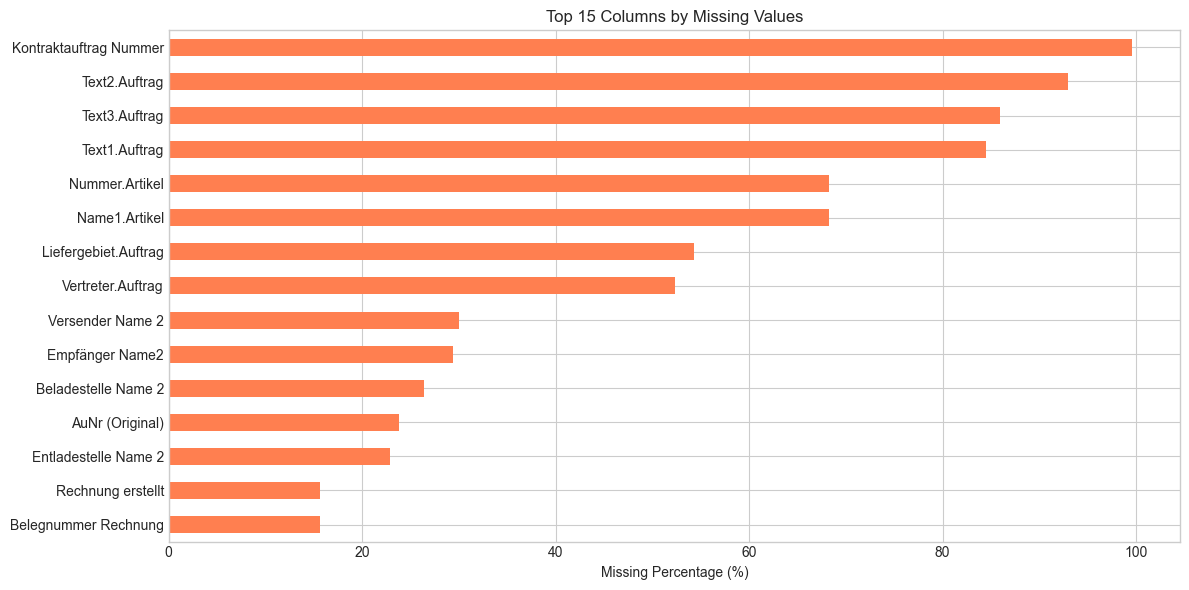

In [9]:
# Visualize missing values for key columns
if len(missing_summary) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    top_missing = missing_summary.head(15)
    top_missing['Missing_Percent'].plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Missing Percentage (%)')
    ax.set_title('Top 15 Columns by Missing Values')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")

### 4.2 Duplicate Rows Check

In [10]:
# Check for duplicate rows
duplicates = df_orders.duplicated().sum()
print(f"Total duplicate rows: {duplicates:,}")
print(f"Percentage: {(duplicates / len(df_orders) * 100):.2f}%")

# Check for duplicate order numbers
if 'Nummer.Auftrag' in df_orders.columns:
    duplicate_orders = df_orders['Nummer.Auftrag'].duplicated().sum()
    print(f"\nDuplicate order numbers: {duplicate_orders:,}")
    print(f"Percentage: {(duplicate_orders / len(df_orders) * 100):.2f}%")

Total duplicate rows: 0
Percentage: 0.00%

Duplicate order numbers: 3,396
Percentage: 2.49%


### 4.3 Data Type Analysis

Data type distribution:
object     90
float64    10
int64       3
Name: count, dtype: int64


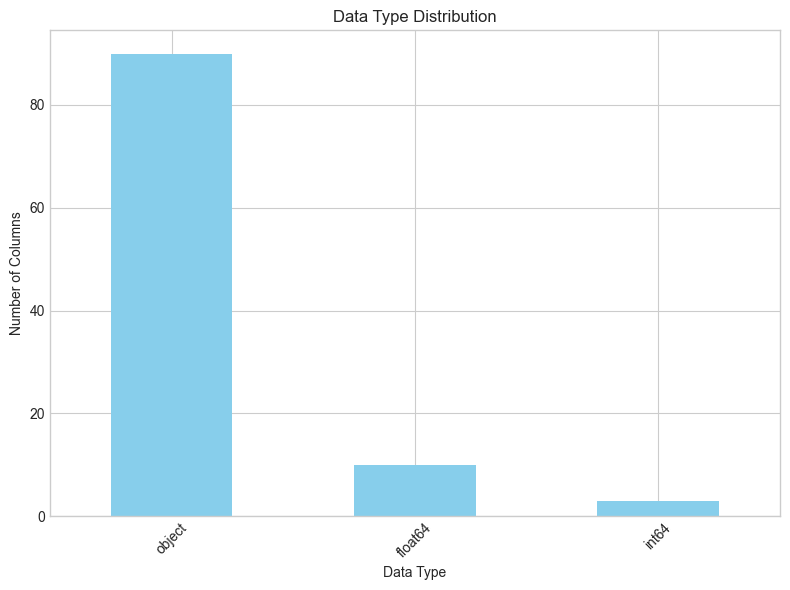

In [11]:
# Analyze data types
dtype_counts = df_orders.dtypes.value_counts()
print("Data type distribution:")
print(dtype_counts)

# Visualize
fig, ax = plt.subplots(figsize=(8, 6))
dtype_counts.plot(kind='bar', ax=ax, color='skyblue')
ax.set_ylabel('Number of Columns')
ax.set_title('Data Type Distribution')
ax.set_xlabel('Data Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Key Column Exploration

Based on the data dictionary from `information/mail.pdf`, let's explore key columns:

### 5.1 Date Columns

In [12]:
# Identify date columns
date_columns = ['Datum.Tour']
existing_date_cols = [col for col in date_columns if col in df_orders.columns]

print(f"Date columns found: {existing_date_cols}")

# Import feature engine for proper date conversion
from utils.traveco_utils import TravecomFeatureEngine

feature_engine = TravecomFeatureEngine(config)

# Convert dates properly
for col in existing_date_cols:
  print(f"\n{col}:")
  print(f"  Original type: {df_orders[col].dtype}")
  print(f"  Sample raw values: {df_orders[col].head(3).tolist()}")

  # Convert using proper Excel date handler
  df_orders[col] = feature_engine.convert_date_column(df_orders[col])

  print(f"  ✓ Converted to: {df_orders[col].dtype}")
  print(f"  Min: {df_orders[col].min()}")
  print(f"  Max: {df_orders[col].max()}")
  print(f"  Range: {(df_orders[col].max() - df_orders[col].min()).days} days")

Date columns found: ['Datum.Tour']

Datum.Tour:
  Original type: int64
  Sample raw values: [45809, 45809, 45809]
  ✓ Converted to: datetime64[ns]
  Min: 2025-06-01 00:00:00
  Max: 2025-06-30 00:00:00
  Range: 29 days


### 5.2 Transport Type Distribution

Transport Type Distribution (Lieferart 2.0):
Lieferart 2.0
Palettentransporte    116675
B&T Fossil             11880
Losetransporte          6270
B&T Holzpellets          674
Lager Auftrag            513
Flüssigtransporte        146
-                          1
Name: count, dtype: int64


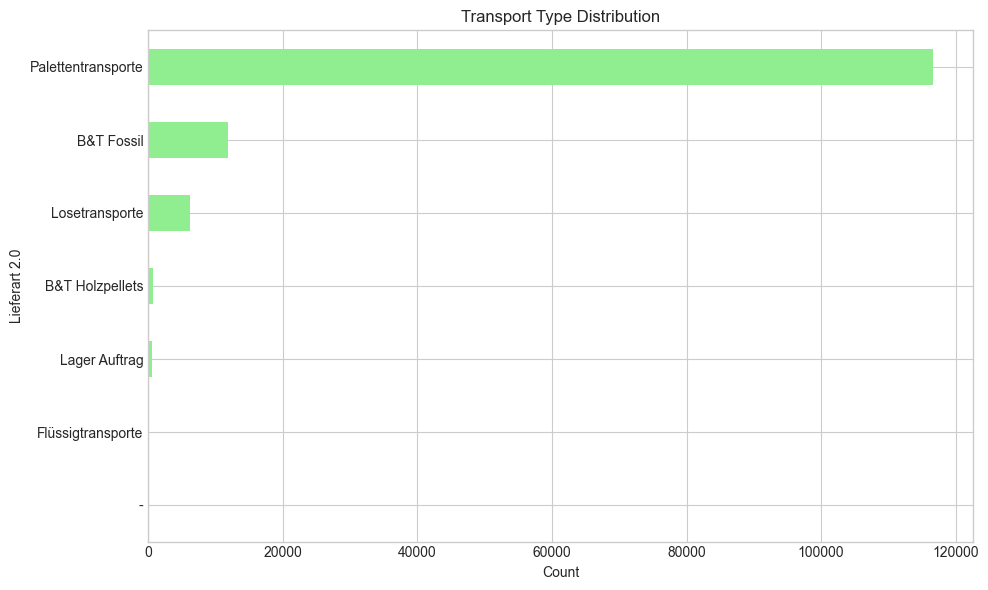

In [13]:
# Explore transport types (Lieferart 2.0 - Column AU)
if 'Lieferart 2.0' in df_orders.columns:
    print("Transport Type Distribution (Lieferart 2.0):")
    transport_dist = df_orders['Lieferart 2.0'].value_counts()
    print(transport_dist)
    
    # Visualize
    fig, ax = plt.subplots(figsize=(10, 6))
    transport_dist.plot(kind='barh', ax=ax, color='lightgreen')
    ax.set_xlabel('Count')
    ax.set_title('Transport Type Distribution')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("'Lieferart 2.0' column not found")

### 5.3 System Distribution (B&T vs TRP)

System Distribution (System_id.Auftrag):
System_id.Auftrag
TRP    123604
B&T     12554
-           1
Name: count, dtype: int64

Percentages:
System_id.Auftrag
TRP    90.78
B&T     9.22
-       0.00
Name: count, dtype: float64


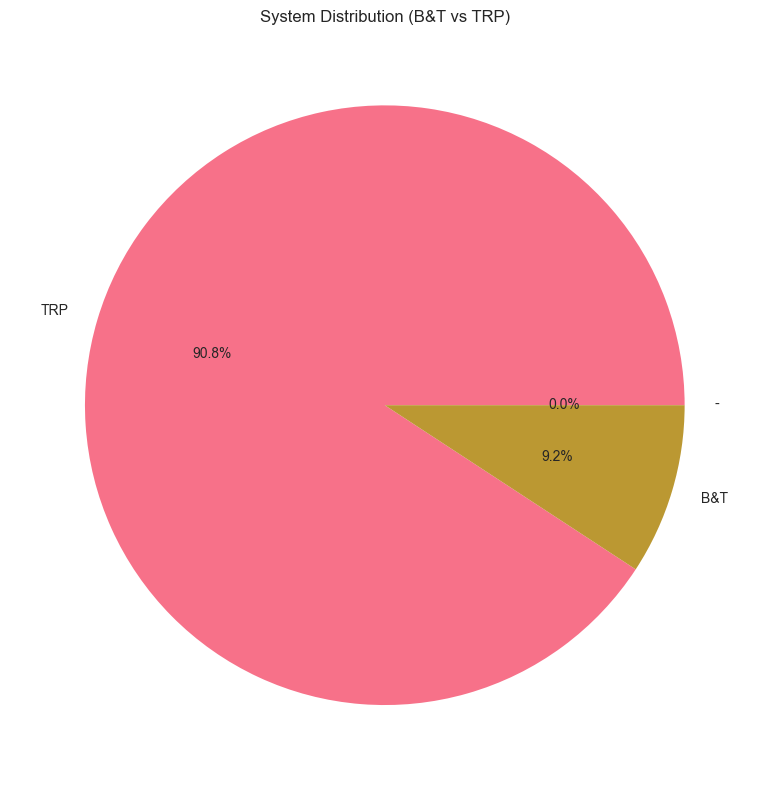

In [14]:
# Explore System ID (Column CW)
if 'System_id.Auftrag' in df_orders.columns:
    print("System Distribution (System_id.Auftrag):")
    system_dist = df_orders['System_id.Auftrag'].value_counts()
    print(system_dist)
    print(f"\nPercentages:")
    print((system_dist / len(df_orders) * 100).round(2))
    
    # Pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    system_dist.plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_ylabel('')
    ax.set_title('System Distribution (B&T vs TRP)')
    plt.tight_layout()
    plt.show()
else:
    print("'System_id.Auftrag' column not found")

### 5.4 Carrier Type Analysis (Internal vs External)

In [15]:
# Analyze carrier numbers (Column BC)
if 'Nummer.Spedition' in df_orders.columns:
    print("Carrier Number Statistics:")
    print(df_orders['Nummer.Spedition'].describe())
    
    # Identify internal vs external based on configuration
    internal_max = config.get('filtering.internal_carrier_max', 8889)
    external_min = config.get('filtering.external_carrier_min', 9000)
    
    df_orders['carrier_type'] = df_orders['Nummer.Spedition'].apply(
        lambda x: 'internal' if pd.notna(x) and x <= internal_max
                 else 'external' if pd.notna(x) and x >= external_min
                 else 'unknown'
    )
    
    print("\nCarrier Type Distribution:")
    carrier_type_dist = df_orders['carrier_type'].value_counts()
    print(carrier_type_dist)
    print(f"\nPercentages:")
    print((carrier_type_dist / len(df_orders) * 100).round(2))
else:
    print("'Nummer.Spedition' column not found")

Carrier Number Statistics:
count     136159
unique       141
top         4000
freq       23714
Name: Nummer.Spedition, dtype: object


TypeError: '<=' not supported between instances of 'str' and 'int'

### 5.5 Pickup vs Delivery (Tilde Flag)

In [16]:
# Analyze Tilde flag (Column CY)
if 'Tilde.Auftrag' in df_orders.columns:
    print("Pickup vs Delivery Distribution (Tilde.Auftrag):")
    tilde_dist = df_orders['Tilde.Auftrag'].value_counts()
    print(tilde_dist)
    print(f"\nPercentages:")
    print((tilde_dist / len(df_orders) * 100).round(2))
    
    # Map to more readable labels
    df_orders['order_type'] = df_orders['Tilde.Auftrag'].map({
        'Ja': 'Pickup (Vorholung)',
        'Nein': 'Delivery (Auslieferung)'
    })
else:
    print("'Tilde.Auftrag' column not found")

Pickup vs Delivery Distribution (Tilde.Auftrag):
Tilde.Auftrag
Nein    118873
Ja       17285
-            1
Name: count, dtype: int64

Percentages:
Tilde.Auftrag
Nein    87.30
Ja      12.69
-        0.00
Name: count, dtype: float64


### 5.6 Tour Type Distribution

Tour Type Distribution (TourTyp.Tour):
TourTyp.Tour
FD                         64840
Normal                     48878
TS                         14957
SH                          4448
Direktlieferung             2181
Bahn Vor-/Nachlauf           405
Intermodal Bahn beladen      245
GE                           173
Intermodal Bahn leer          31
-                              1
Name: count, dtype: int64


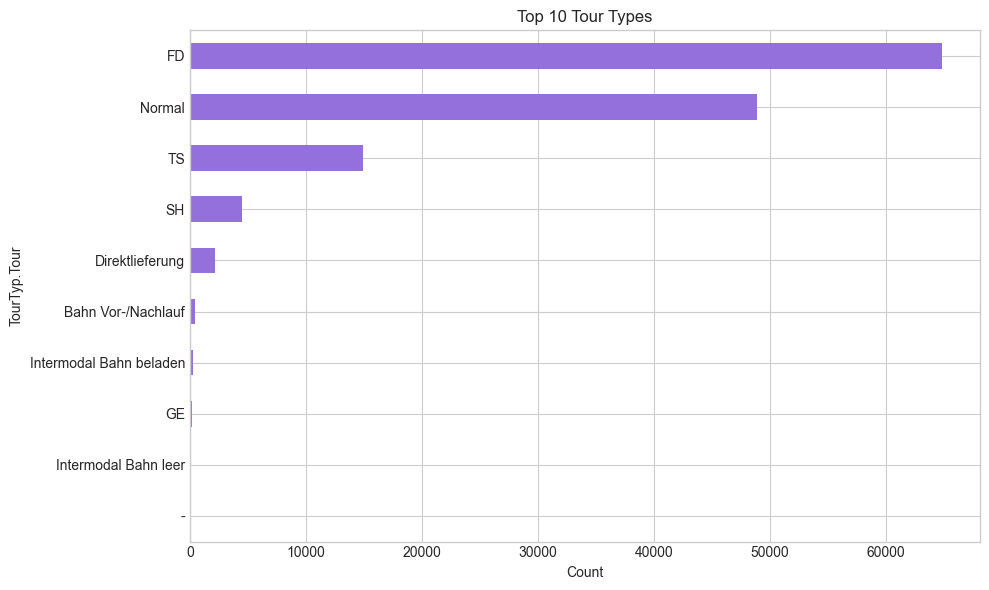

In [18]:
# Analyze tour types (Column CT)
if 'TourTyp.Tour' in df_orders.columns:
    print("Tour Type Distribution (TourTyp.Tour):")
    tour_type_dist = df_orders['TourTyp.Tour'].value_counts()
    print(tour_type_dist)
    
    # Visualize top 10
    fig, ax = plt.subplots(figsize=(10, 6))
    tour_type_dist.head(10).plot(kind='barh', ax=ax, color='mediumpurple')
    ax.set_xlabel('Count')
    ax.set_title('Top 10 Tour Types')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("'TourTyp.Tour' column not found")

## 6. Apply Business Filtering Rules

In [19]:
# Initialize data cleaner
cleaner = TravecomDataCleaner(config)

# Apply filtering rules (exclude B&T pickup orders)
print("Applying business filtering rules...")
df_filtered = cleaner.apply_filtering_rules(df_orders)

print(f"\nOriginal rows: {len(df_orders):,}")
print(f"Filtered rows: {len(df_filtered):,}")
print(f"Rows removed: {len(df_orders) - len(df_filtered):,}")
print(f"Retention rate: {(len(df_filtered) / len(df_orders) * 100):.2f}%")

Applying business filtering rules...

Original rows: 136,159
Filtered rows: 136,159
Rows removed: 0
Retention rate: 100.00%


## 7. Summary Statistics

In [20]:
# Validate filtered data
validation_results = cleaner.validate_data(df_filtered)


Data Validation Summary:
  Total rows: 136,159
  Total columns: 104
  Duplicate rows: 0
  Columns with missing values: 30


## 8. Customer Divisions Analysis

In [21]:
# Explore customer divisions (Sparten)
if not df_divisions.empty:
    print("Customer Divisions Summary:")
    print(f"Total unique customers: {df_divisions.iloc[:, 0].nunique()}")
    
    # Show division distribution if column exists
    if len(df_divisions.columns) > 1:
        division_col = df_divisions.columns[1]  # Assuming second column is division
        print(f"\nDivision Distribution ({division_col}):")
        print(df_divisions[division_col].value_counts())
else:
    print("Divisions data is empty")

Customer Divisions Summary:
Total unique customers: 382

Division Distribution (PLZ):
PLZ
6210    17
7000     6
8401     4
7302     4
3315     4
        ..
1870     1
3324     1
1906     1
7437     1
9565     1
Name: count, Length: 281, dtype: int64


## 9. Key Insights and Next Steps

In [22]:
print("=" * 80)
print("KEY INSIGHTS FROM DATA EXPLORATION")
print("=" * 80)

print(f"\n1. DATA VOLUME:")
print(f"   - Total orders loaded: {len(df_orders):,}")
print(f"   - After filtering: {len(df_filtered):,}")
print(f"   - Total columns: {len(df_orders.columns)}")

print(f"\n2. DATA QUALITY:")
print(f"   - Duplicate rows: {df_orders.duplicated().sum():,}")
print(f"   - Columns with missing values: {(df_orders.isnull().sum() > 0).sum()}")

if existing_date_cols:
    date_col = existing_date_cols[0]
    print(f"\n3. DATE RANGE:")
    print(f"   - From: {df_orders[date_col].min()}")
    print(f"   - To: {df_orders[date_col].max()}")

print(f"\n4. NEXT STEPS:")
print(f"   - Proceed to notebook 02: Data Cleaning and Validation")
print(f"   - Handle missing values")
print(f"   - Convert data types")
print(f"   - Create clean dataset for feature engineering")

print("\n" + "=" * 80)

KEY INSIGHTS FROM DATA EXPLORATION

1. DATA VOLUME:
   - Total orders loaded: 136,159
   - After filtering: 136,159
   - Total columns: 104

2. DATA QUALITY:
   - Duplicate rows: 0
   - Columns with missing values: 30

3. DATE RANGE:
   - From: 2025-06-01 00:00:00
   - To: 2025-06-30 00:00:00

4. NEXT STEPS:
   - Proceed to notebook 02: Data Cleaning and Validation
   - Handle missing values
   - Convert data types
   - Create clean dataset for feature engineering



## 10. Save Summary Report

In [24]:
# Create summary report
summary = {
  'total_orders': int(len(df_orders)),  # Convert to native Python int
  'filtered_orders': int(len(df_filtered)),
  'total_columns': int(len(df_orders.columns)),
  'missing_value_columns': int((df_orders.isnull().sum() > 0).sum()),
  'duplicate_rows': int(df_orders.duplicated().sum()),
}

if existing_date_cols:
  date_col = existing_date_cols[0]
  summary['date_range_start'] = str(df_orders[date_col].min())
  summary['date_range_end'] = str(df_orders[date_col].max())

# Save as JSON
import json
results_path = Path('../results')
results_path.mkdir(exist_ok=True)

with open(results_path / 'data_exploration_summary.json', 'w') as f:
  json.dump(summary, f, indent=2)

print("Summary report saved to: results/data_exploration_summary.json")
print("\n✓ Notebook 01 complete!")

Summary report saved to: results/data_exploration_summary.json

✓ Notebook 01 complete!


---

## Conclusion

This notebook successfully loaded and explored all three Traveco data files. We identified:
- Data structure and column mappings
- Missing value patterns
- Business filtering requirements
- Key distributions (transport types, systems, carriers)

**Next:** Proceed to `02_data_cleaning_and_validation.ipynb` for data cleaning and preparation.